<a href="https://colab.research.google.com/github/Randa1989/Demo/blob/main/Spaceship_Titanic_EDA%2BVisualization%2BModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#importing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder

import os
from google.colab import files
import io
data=files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
import io
data=files.upload()

Saving test.csv to test.csv


In [3]:
from google.colab import files
import io
data=files.upload()

Saving sample_submission.csv to sample_submission.csv


In [5]:
train=pd.read_csv('train.csv')


In [15]:
test=pd.read_csv('test.csv')

In [16]:
sample=pd.read_csv('sample_submission.csv')

In [17]:
all_data = pd.concat([train,test],axis = 0).reset_index(drop = True)


In [23]:
#drop PassengerId and Name
all_data=all_data.drop(["PassengerId","Name"],axis=1)

In [24]:
all_data.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [25]:
all_data.columns


Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [26]:
all_data.shape

(12970, 12)

In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Transported   8693 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1.2+ MB


In [29]:
all_data.isnull().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64

In [30]:
all_data["Cabin"].value_counts() 

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [31]:
all_data["HomePlanet"].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [32]:
all_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


##Variable Description¶


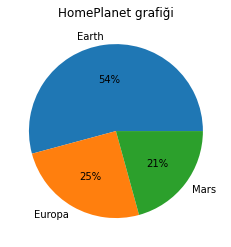

['Earth', 'Europa', 'Mars']: 
 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


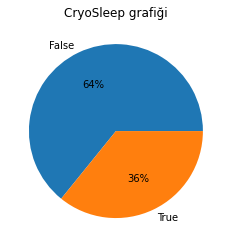

[False, True]: 
 False    5439
True     3037
Name: CryoSleep, dtype: int64


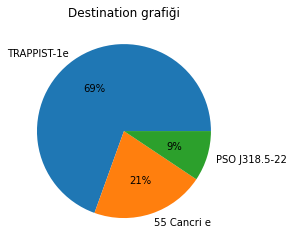

['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']: 
 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


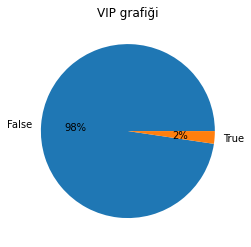

[False, True]: 
 False    8291
True      199
Name: VIP, dtype: int64


In [33]:
def pie_plot(kolon): #We created a function to customize the pie chart
    
    labels = list(train[kolon].value_counts().index)
    plt.pie(train[kolon].value_counts(),labels = labels, 
           autopct = "%1.f%%")
    plt.title(kolon + " grafiği")
    plt.show()
    print("{}: \n {}".format(labels,train[kolon].value_counts()))

kategorik = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for column in kategorik: #We used for loop to print all categorical variables

    pie_plot(column)


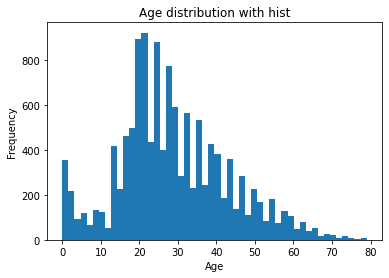

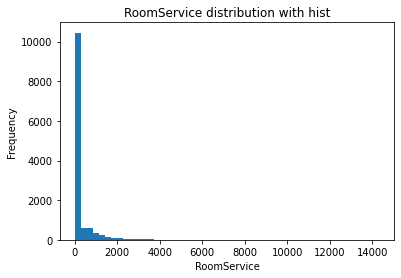

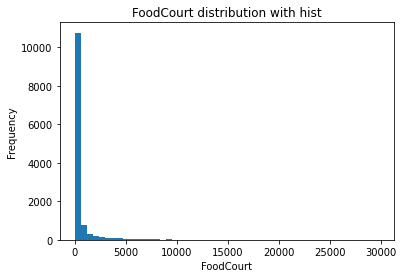

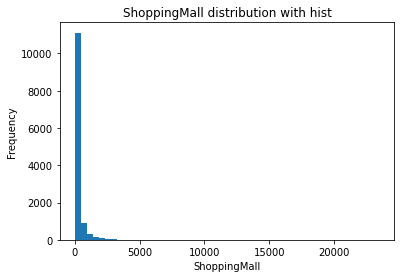

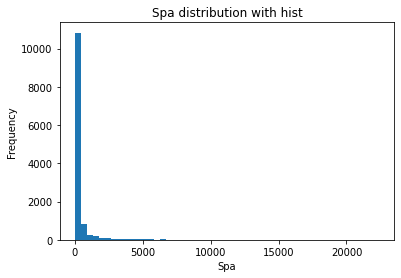

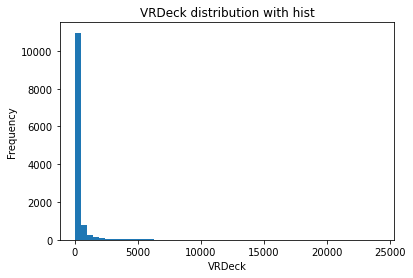

In [35]:
# visualization of numeric variables
category=["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

for i in category:
    plt.hist(all_data[i], bins = 50)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(i))
    plt.show()
    

Age,RoomService,FoodCourt,ShoppingMall,Spa and VRDeck variables in the future we will combine it into one variable.


#Data analasys

In [36]:
all_data[["HomePlanet","Transported"]].groupby(["HomePlanet"], as_index = False).mean().sort_values(by="Transported",ascending = False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [37]:
all_data[["CryoSleep","Transported"]].groupby(["CryoSleep"], as_index = False).mean().sort_values(by="Transported",ascending = False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921
